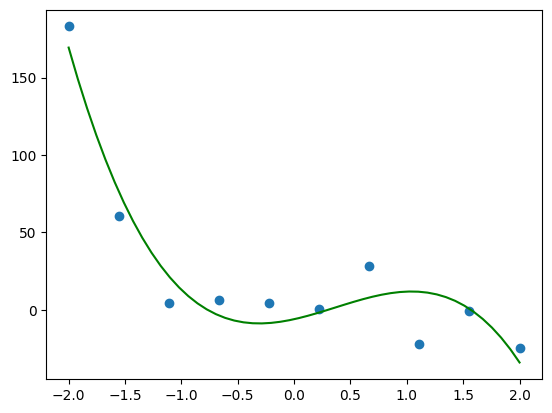

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

train10 = pd.read_csv("Dataset1/Dataset1/train10.txt")

plt.scatter(train10.x, train10.y)

polyline = np.linspace(train10.x.min(), train10.x.max())

model1 = np.poly1d(np.polyfit(train10.x, train10.y, 3))
plt.plot(polyline, model1(polyline), color='green')

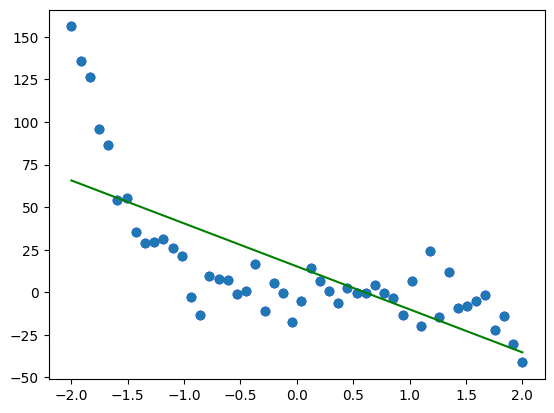

In [53]:
train50 = pd.read_csv("Dataset1/Dataset1/train50.txt")

plt.scatter(train50.x, train50.y, color = "blue")

x = np.array(train50.x)
y = np.array(train50.y)

X = np.column_stack((np.ones(x.shape[0]), x))

coeff = np.linalg.pinv(X.T @ X) @ (X.T @ y)

Y_pred = X @ coeff

plt.scatter(x, y)

plt.plot(x, Y_pred, color = "green")

[ 23.96978788 -32.32286544]
[ 88.61551877  74.2498008   59.88408282  45.51836485  31.15264687
  16.7869289    2.42121092 -11.94450705 -26.31022503 -40.67594301]


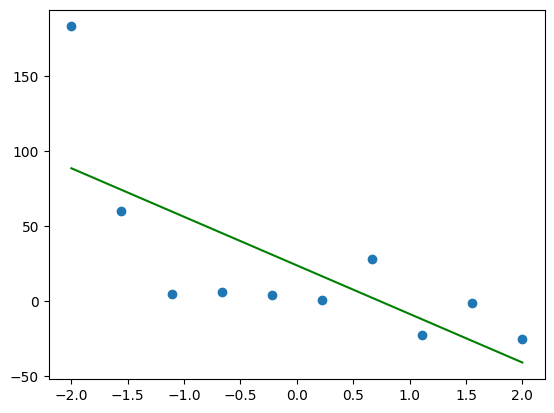

In [54]:
x = np.array(train10.x)
y = np.array(train10.y)

X = np.column_stack((np.ones(x.shape[0]), x))

coeff = np.linalg.pinv(X.T @ X) @ (X.T @ y)
print(coeff)

Y_pred = X @ coeff

print(Y_pred)

plt.scatter(x, y)

plt.plot(x, Y_pred, color = "green")

In [172]:
def combinations_with_replacement(seq, r):
    # seq: list or range of elements
    # r: length of each combination
    pool = tuple(seq)
    n = len(pool)
    if not n and r:
        return
    indices = [0] * r
    yield tuple(pool[i] for i in indices)
    while True:
        for i in reversed(range(r)):
            if indices[i] != n - 1:
                break
        else:
            return
        indices[i:] = [indices[i] + 1] * (r - i)
        yield tuple(pool[i] for i in indices)

#modularizing polynomial regression 

class PolyRegression:
    def __init__(self, degree:int, number:int, lmbda:float = 0.0):
        self.degree = degree
        self.number = number
        self.coeff = None
        self.lmbda = lmbda

    def _design_matrix(self, X: np.ndarray) -> np.ndarray:
        X = X.reshape(len(X), self.number)
        n_samples, n_features = X.shape
        Phi = [np.ones(n_samples)]  # Bias term (column of 1s)
        # Add all polynomial terms up to self.degree
        for deg in range(1, self.degree + 1):
            combs = list(combinations_with_replacement(range(n_features), deg))
            for comb in combs:
                term = np.ones(n_samples)
                for idx in comb:
                    term *= X[:, idx]
                Phi.append(term)
        return np.column_stack(Phi)
    
    def fit(self, X:np.ndarray, y:np.ndarray):
        Phi = self._design_matrix(X)

        #adding regualarization to the model
        n_params = Phi.shape[1]
        I = np.eye(n_params)
        I[0, 0] = 0     #Do not regularize the bias term
    
        self.coeff = np.linalg.pinv(Phi.T @ Phi + self.lmbda * I) @ (Phi.T @ y)

    def output(self, X:np.ndarray) -> np.ndarray:
        Phi = self._design_matrix(X)
        return Phi @ self.coeff
    
    def ERMSE(self, X:np.ndarray, y:np.ndarray) -> float:
        pred = self.output(X)
        results = np.square(np.subtract(pred, y)).mean()
        return np.sqrt(results)
    

x = np.array(train10.x)
y = np.array(train10.y)

x1 = np.array(train50.x)
y1 = np.array(train50.y)

trainvalid = pd.read_csv("Dataset1/Dataset1/val.txt")

xvalid = np.array(trainvalid.x)
yvalid = np.array(trainvalid.y)

Training ERMSE = 16.30233646505157
Validation ERMSE = 16.634787990510294
Training ERMSE = 10.550238713377587
Validation ERMSE = 15.484271300798612


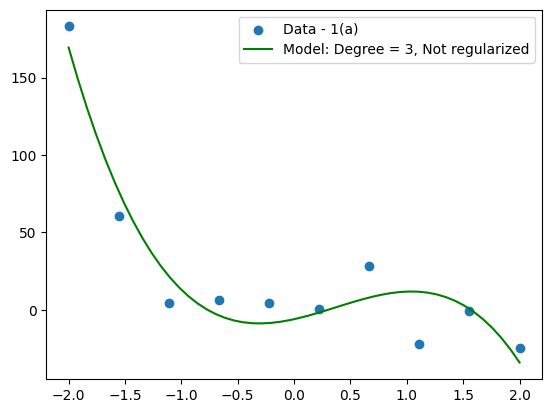

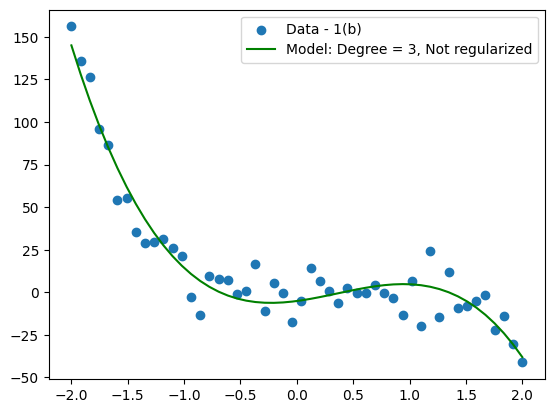

In [56]:
model3a = PolyRegression(degree = 3, number = 1)
model3a.fit(x, y)

error1 = model3a.ERMSE(x, y)
error2 = model3a.ERMSE(xvalid, yvalid)

polyline = np.linspace(x.min(), x.max())

plt.figure()
plt.scatter(x, y, label = "Data - 1(a)")
plt.plot(polyline, model3a.output(polyline), color = "green", label = "Model: Degree = 3, Not regularized")
plt.legend()
print("Training ERMSE =",error1)
print("Validation ERMSE =", error2)

model3b = PolyRegression(degree = 3, number = 1)

model3b.fit(x1, y1)
polyline = np.linspace(x1.min(), x1.max())

error1 = model3b.ERMSE(x1, y1)
error2 = model3b.ERMSE(xvalid, yvalid)

plt.figure()
plt.scatter(x1, y1, label = "Data - 1(b)")
plt.plot(polyline, model3b.output(polyline), color = "green", label = "Model: Degree = 3, Not regularized")
plt.legend()
print("Training ERMSE =", error1)
print("Validation ERMSE =", error2)

Training ERMSE = 10.773836773109563
Validation ERMSE = 12.856788143814258
Training ERMSE = 9.201742087853738
Validation ERMSE = 13.749369718414671


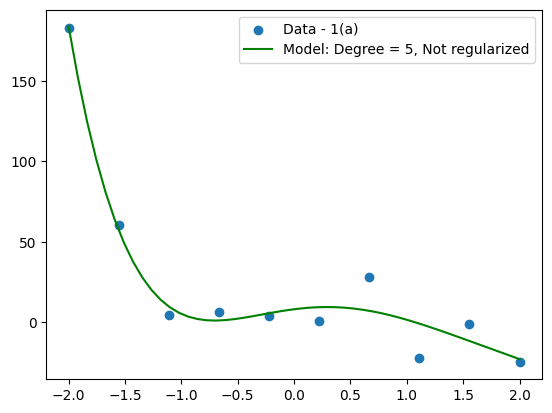

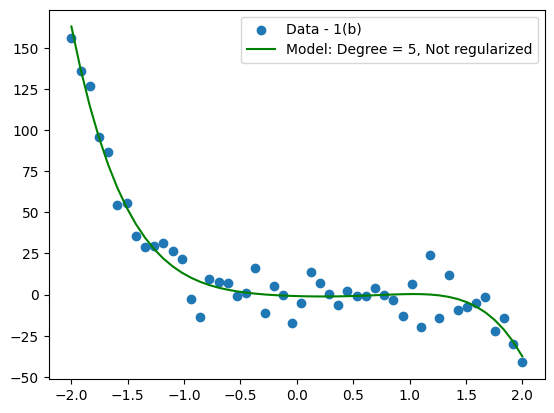

In [57]:
model5a = PolyRegression(degree = 5, number = 1)
model5a.fit(x, y)

error1 = model5a.ERMSE(x, y)
error2 = model5a.ERMSE(xvalid, yvalid)

polyline = np.linspace(x.min(), x.max())

plt.figure()
plt.scatter(x, y, label = "Data - 1(a)")
plt.plot(polyline, model5a.output(polyline), color = "green", label = "Model: Degree = 5, Not regularized")
plt.legend()
print("Training ERMSE =",error1)
print("Validation ERMSE =", error2)

model5b = PolyRegression(degree = 5, number = 1)

model5b.fit(x1, y1)
polyline = np.linspace(x1.min(), x1.max())

error1 = model5b.ERMSE(x1, y1)
error2 = model5b.ERMSE(xvalid, yvalid)

plt.figure()
plt.scatter(x1, y1, label = "Data - 1(b)")
plt.plot(polyline, model5b.output(polyline), color = "green", label = "Model: Degree = 5, Not regularized")
plt.legend()
print("Training ERMSE =", error1)
print("Validation ERMSE =", error2)

Training ERMSE = 9.847765077873797
Validation ERMSE = 13.411953993783916
Training ERMSE = 9.107263794803698
Validation ERMSE = 13.636737508275845


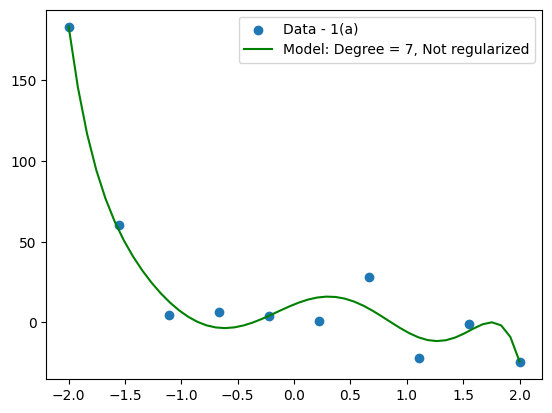

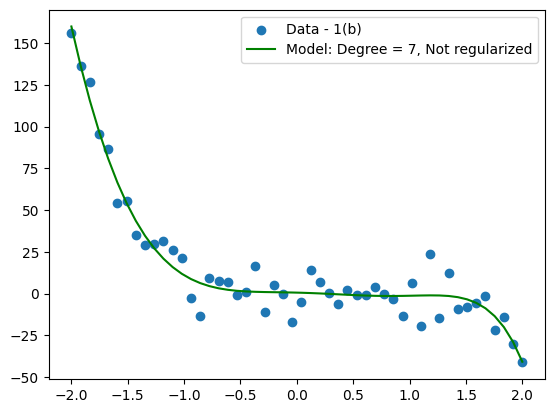

In [58]:
model7a = PolyRegression(degree = 7, number = 1)
model7a.fit(x, y)

error1 = model7a.ERMSE(x, y)
error2 = model7a.ERMSE(xvalid, yvalid)

polyline = np.linspace(x.min(), x.max())

plt.figure()
plt.scatter(x, y, label = "Data - 1(a)")
plt.plot(polyline, model7a.output(polyline), color = "green", label = "Model: Degree = 7, Not regularized")
plt.legend()
print("Training ERMSE =",error1)
print("Validation ERMSE =", error2)

model7b = PolyRegression(degree = 7, number = 1)

model7b.fit(x1, y1)
polyline = np.linspace(x1.min(), x1.max())

error1 = model7b.ERMSE(x1, y1)
error2 = model7b.ERMSE(xvalid, yvalid)

plt.figure()
plt.scatter(x1, y1, label = "Data - 1(b)")
plt.plot(polyline, model7b.output(polyline), color = "green", label = "Model: Degree = 7, Not regularized")
plt.legend()
print("Training ERMSE =", error1)
print("Validation ERMSE =", error2)

Training ERMSE = 2.203594819316983e-08
Validation ERMSE = 41.779684198893484
Training ERMSE = 9.011675057630685
Validation ERMSE = 13.799236088914178


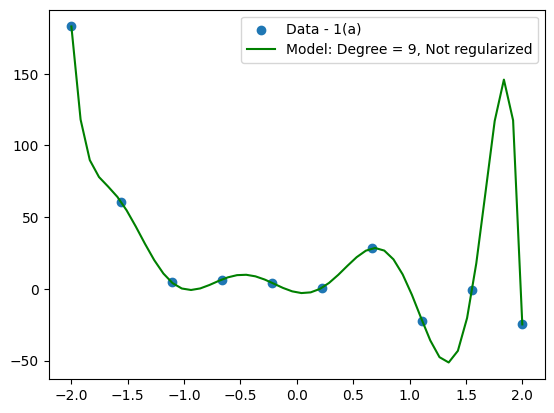

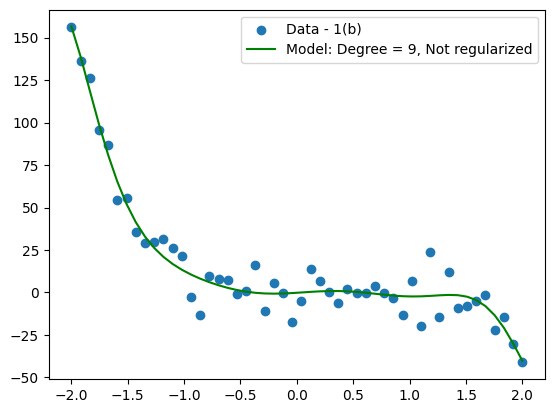

In [59]:
model9a = PolyRegression(degree = 9, number = 1)
model9a.fit(x, y)

error1 = model9a.ERMSE(x, y)
error2 = model9a.ERMSE(xvalid, yvalid)

polyline = np.linspace(x.min(), x.max())

plt.figure()
plt.scatter(x, y, label = "Data - 1(a)")
plt.plot(polyline, model9a.output(polyline), color = "green", label = "Model: Degree = 9, Not regularized")
plt.legend()
print("Training ERMSE =",error1)
print("Validation ERMSE =", error2)

model9b = PolyRegression(degree = 9, number = 1)

model9b.fit(x1, y1)
polyline = np.linspace(x1.min(), x1.max())

error1 = model9b.ERMSE(x1, y1)
error2 = model9b.ERMSE(xvalid, yvalid)

plt.figure()
plt.scatter(x1, y1, label = "Data - 1(b)")
plt.plot(polyline, model9b.output(polyline), color = "green", label = "Model: Degree = 9, Not regularized")
plt.legend()
print("Training ERMSE =", error1)
print("Validation ERMSE =", error2)

Question 2:

Training ERMSE = 10.072035747691903
Validation ERMSE = 11.494584507193082
Training ERMSE = 23.170919108074067
Validation ERMSE = 24.534439278318395


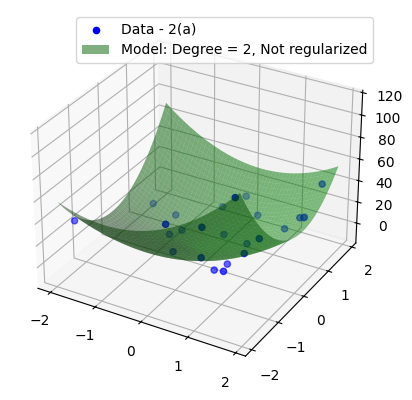

/home/deepanjandas1/.local/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


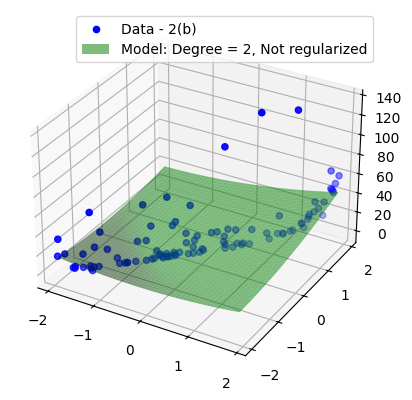

In [60]:
train25 = pd.read_csv("Dataset2/Dataset2/train25.csv")

train100 = pd.read_csv("Dataset2/Dataset2/train100.csv")

valid = pd.read_csv("Dataset2/Dataset2/validation.csv")

x1 = np.array(train25.x1)
x2 = np.array(train25.x2)
y = np.array(train25.y)

x11 = np.array(train100.x1)
x22 = np.array(train100.x1)
y1 = np.array(train100.y)

x1v = np.array(valid.x1)
x2v = np.array(valid.x2)
yvalid = np.array(valid.y)

x = np.column_stack((x1, x2))
x1 = np.column_stack((x11, x22))
xvalid = np.column_stack((x1v, x2v))

model = PolyRegression(degree = 2, number=2)
model.fit(x, y)

error1 = model.ERMSE(x, y)
error2 = model.ERMSE(xvalid, yvalid)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x[:,0], x[:,1], y, color = "blue", label = "Data - 2(a)")

x1_range = np.linspace(min(x1.min(), x2.min()), max(x1.max(), x2.max()))
X1, X2 = np.meshgrid(x1_range, x1_range)
grid_points = np.column_stack([X1.ravel(), X2.ravel()])
Z = model.output(grid_points).reshape(X1.shape)
ax.plot_surface(X1, X2, Z, color="green", alpha = 0.5, label = "Model: Degree = 2, Not regularized")

ax.legend()
print("Training ERMSE =",error1)
print("Validation ERMSE =", error2)

model1 = PolyRegression(degree = 2, number = 2)

model1.fit(x1, y1)
polyline = np.linspace(x1.min(), x1.max())

error1 = model1.ERMSE(x1, y1)
error2 = model1.ERMSE(xvalid, yvalid)

fig1 = plt.figure()
ax = fig1.add_subplot(111, projection='3d')
ax.scatter(x1[:,0], x1[:,1], y1, color = "blue", label = "Data - 2(b)")

x11_range = np.linspace(min(x11.min(), x22.min()), max(x11.max(), x22.max()))
X11, X22 = np.meshgrid(x1_range, x1_range)
grid_points1 = np.column_stack([X11.ravel(), X22.ravel()])
Z1 = model1.output(grid_points1).reshape(X11.shape)
ax.plot_surface(X11, X22, Z1, color="green", alpha = 0.5, label = "Model: Degree = 2, Not regularized")

ax.legend()
print("Training ERMSE =", error1)
print("Validation ERMSE =", error2)

Training ERMSE = 1.4766884419619344
Validation ERMSE = 5.364932065185169
Training ERMSE = 23.00790490301
Validation ERMSE = 24.50174236414003


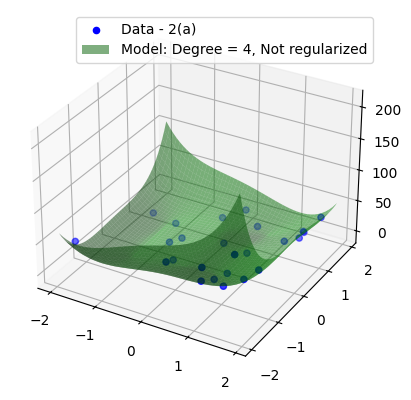

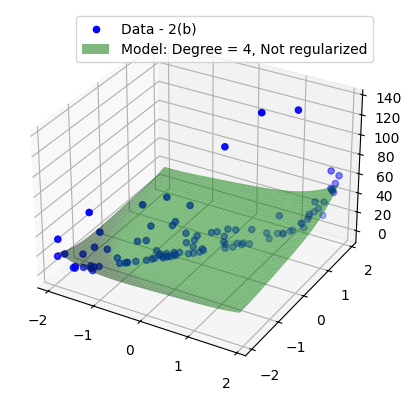

In [61]:
model = PolyRegression(degree = 4, number=2)
model.fit(x, y)

error1 = model.ERMSE(x, y)
error2 = model.ERMSE(xvalid, yvalid)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x[:,0], x[:,1], y, color = "blue", label = "Data - 2(a)")

x1_range = np.linspace(min(x1.min(), x2.min()), max(x1.max(), x2.max()))
X1, X2 = np.meshgrid(x1_range, x1_range)
grid_points = np.column_stack([X1.ravel(), X2.ravel()])
Z = model.output(grid_points).reshape(X1.shape)
ax.plot_surface(X1, X2, Z, color="green", alpha = 0.5, label = "Model: Degree = 4, Not regularized")

ax.legend()

print("Training ERMSE =",error1)
print("Validation ERMSE =", error2)

model1 = PolyRegression(degree = 4, number = 2)

model1.fit(x1, y1)
polyline = np.linspace(x1.min(), x1.max())

error1 = model1.ERMSE(x1, y1)
error2 = model1.ERMSE(xvalid, yvalid)

fig1 = plt.figure()
ax = fig1.add_subplot(111, projection='3d')
ax.scatter(x1[:,0], x1[:,1], y1, color = "blue", label = "Data - 2(b)")

x11_range = np.linspace(min(x11.min(), x22.min()), max(x11.max(), x22.max()))
X11, X22 = np.meshgrid(x1_range, x1_range)
grid_points1 = np.column_stack([X11.ravel(), X22.ravel()])
Z1 = model1.output(grid_points1).reshape(X11.shape)
ax.plot_surface(X11, X22, Z1, color="green", alpha = 0.5, label = "Model: Degree = 4, Not regularized")

ax.legend()

print("Training ERMSE =", error1)
print("Validation ERMSE =", error2)

Training ERMSE = 4.571271411275195e-10
Validation ERMSE = 11.758834362372033
Training ERMSE = 22.841750513283056
Validation ERMSE = 24.528687131731935


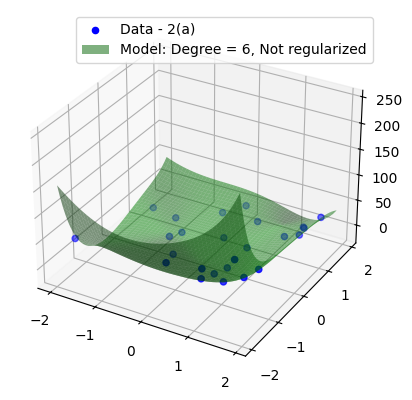

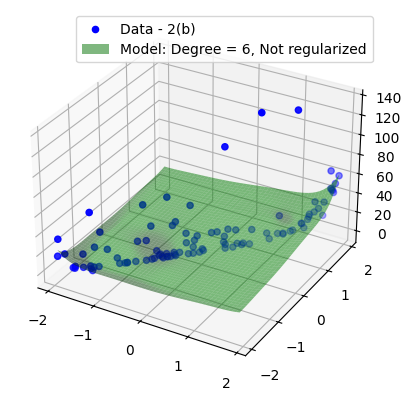

In [62]:
model = PolyRegression(degree = 6, number=2)
model.fit(x, y)

error1 = model.ERMSE(x, y)
error2 = model.ERMSE(xvalid, yvalid)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x[:,0], x[:,1], y, color = "blue", label = "Data - 2(a)")

x1_range = np.linspace(min(x1.min(), x2.min()), max(x1.max(), x2.max()))
X1, X2 = np.meshgrid(x1_range, x1_range)
grid_points = np.column_stack([X1.ravel(), X2.ravel()])
Z = model.output(grid_points).reshape(X1.shape)
ax.plot_surface(X1, X2, Z, color="green", alpha = 0.5, label = "Model: Degree = 6, Not regularized")

ax.legend()

print("Training ERMSE =",error1)
print("Validation ERMSE =", error2)

model1 = PolyRegression(degree = 6, number = 2)

model1.fit(x1, y1)
polyline = np.linspace(x1.min(), x1.max())

error1 = model1.ERMSE(x1, y1)
error2 = model1.ERMSE(xvalid, yvalid)

fig1 = plt.figure()
ax = fig1.add_subplot(111, projection='3d')
ax.scatter(x1[:,0], x1[:,1], y1, color = "blue", label = "Data - 2(b)")

x11_range = np.linspace(min(x11.min(), x22.min()), max(x11.max(), x22.max()))
X11, X22 = np.meshgrid(x1_range, x1_range)
grid_points1 = np.column_stack([X11.ravel(), X22.ravel()])
Z1 = model1.output(grid_points1).reshape(X11.shape)
ax.plot_surface(X11, X22, Z1, color="green", alpha = 0.5, label = "Model: Degree = 6, Not regularized")

ax.legend()

print("Training ERMSE =", error1)
print("Validation ERMSE =", error2)

Training ERMSE = 1.2689176561805267e-10
Validation ERMSE = 13.6942339266993
Training ERMSE = 22.824845426372963
Validation ERMSE = 24.52440537408198


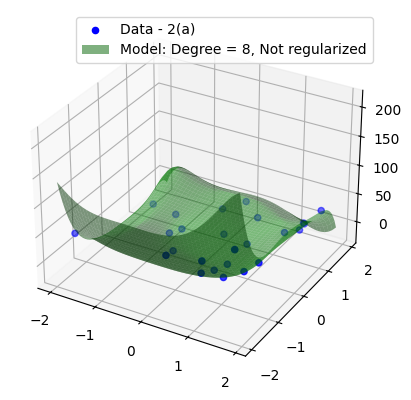

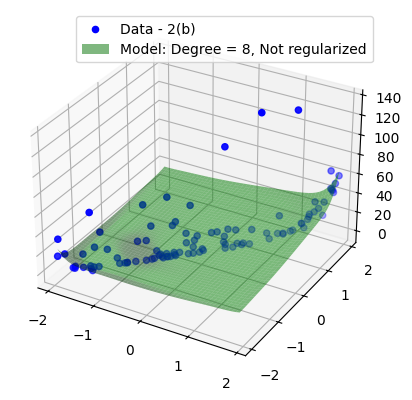

In [63]:
model = PolyRegression(degree = 8, number=2)
model.fit(x, y)

error1 = model.ERMSE(x, y)
error2 = model.ERMSE(xvalid, yvalid)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x[:,0], x[:,1], y, color = "blue", label = "Data - 2(a)")

x1_range = np.linspace(min(x1.min(), x2.min()), max(x1.max(), x2.max()))
X1, X2 = np.meshgrid(x1_range, x1_range)
grid_points = np.column_stack([X1.ravel(), X2.ravel()])
Z = model.output(grid_points).reshape(X1.shape)
ax.plot_surface(X1, X2, Z, color="green", alpha = 0.5, label = "Model: Degree = 8, Not regularized")

ax.legend()

print("Training ERMSE =",error1)
print("Validation ERMSE =", error2)

model1 = PolyRegression(degree = 8, number = 2)

model1.fit(x1, y1)
polyline = np.linspace(x1.min(), x1.max())

error1 = model1.ERMSE(x1, y1)
error2 = model1.ERMSE(xvalid, yvalid)

fig1 = plt.figure()
ax = fig1.add_subplot(111, projection='3d')
ax.scatter(x1[:,0], x1[:,1], y1, color = "blue", label = "Data - 2(b)")

x11_range = np.linspace(min(x11.min(), x22.min()), max(x11.max(), x22.max()))
X11, X22 = np.meshgrid(x1_range, x1_range)
grid_points1 = np.column_stack([X11.ravel(), X22.ravel()])
Z1 = model1.output(grid_points1).reshape(X11.shape)
ax.plot_surface(X11, X22, Z1, color="green", alpha = 0.5,label = "Model: Degree = 8, Not regularized")

ax.legend()

print("Training ERMSE =", error1)
print("Validation ERMSE =", error2)

No overfitting for degree = 3
No overfitting for degree = 5
No overfitting for degree = 7


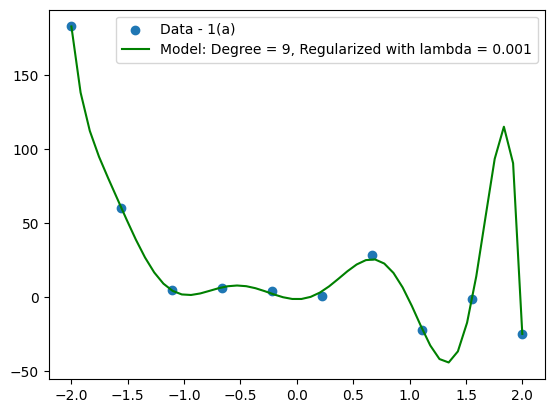

Training ERMSE = 1.4631809811737224


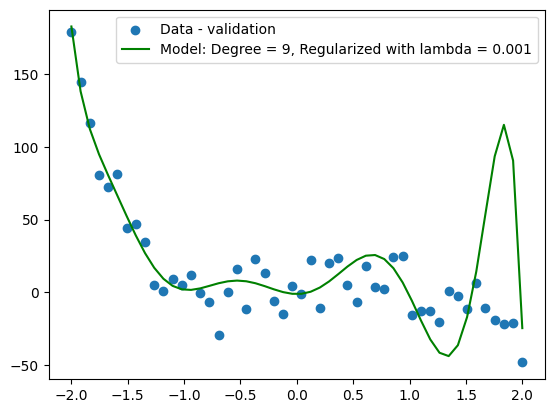

Validation ERMSE = 34.65566997433752


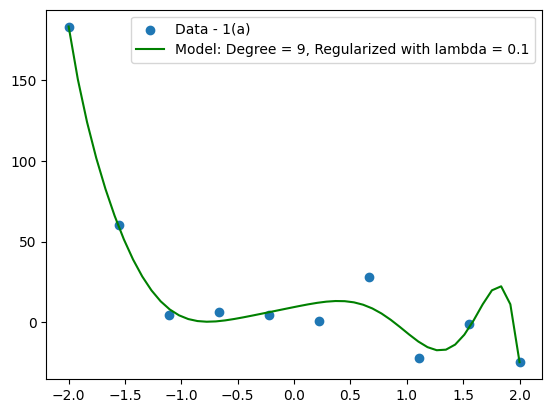

Training ERMSE = 7.991259243624277


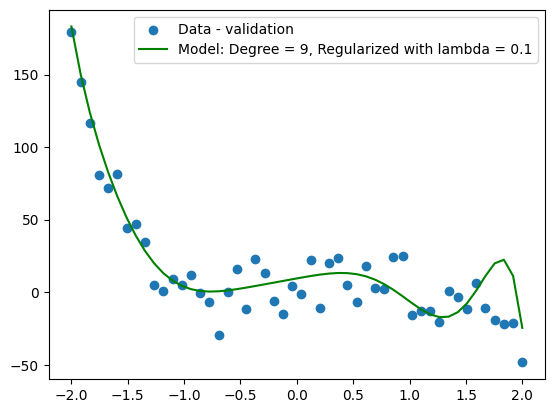

Validation ERMSE = 16.054478611176055


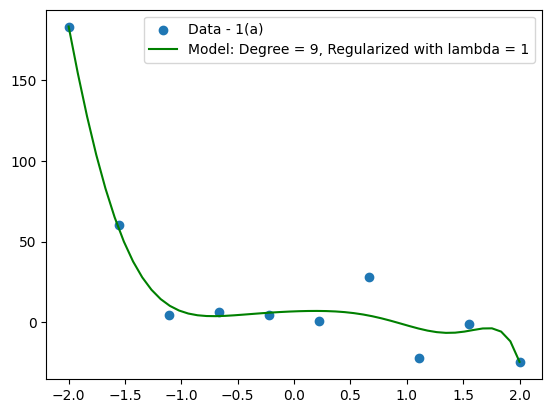

Training ERMSE = 10.099279560543172


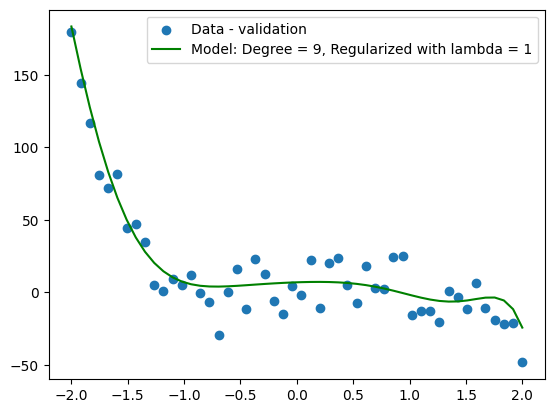

Validation ERMSE = 13.41660041017166
Best lambda for degree = 9 is 1, with a Validation ERMSE = 13.41660041017166
Best performing model := degree = 9, lambda = 1, with Validation ERMSE = 13.41660041017166


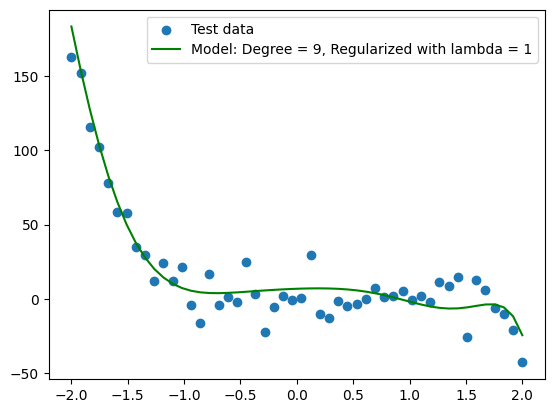

Test ERMSE = 11.918809858167954


In [69]:
#Choosing the best regularization for Dataset 1(a), degree = 1:
x = np.array(train10.x)
y = np.array(train10.y)

x1 = np.array(train50.x)
y1 = np.array(train50.y)

trainvalid = pd.read_csv("Dataset1/Dataset1/val.txt")

xvalid = np.array(trainvalid.x)
yvalid = np.array(trainvalid.y)

lambdas = [0.001, 0.1, 1]
degrees = [3, 5, 7, 9]
best_model = (0,0.0)
best_ermse = float('inf')

for deg in degrees:
    #check if there is overfitting, if not, output "no overfitting"
    model = PolyRegression(degree = deg, number = 1)
    model.fit(x, y)
    error1 = model.ERMSE(x, y)
    error2 = model.ERMSE(xvalid, yvalid)

    if error2 < 1.5 * error1 :                          #hyperparameter : overfit threshold ratio, decide on this
        print(f"No overfitting for degree = {deg}")
        continue

    best_lambda = None
    best_loc_ermse = float('inf')
    for lmb in lambdas:
        model = PolyRegression(degree = deg, number = 1, lmbda = lmb)
        model.fit(x, y)
        error1 = model.ERMSE(x, y)
        error2 = model.ERMSE(xvalid, yvalid)

        polyline = np.linspace(x.min(), x.max())

        plt.figure()
        plt.scatter(x, y, label = "Data - 1(a)")
        plt.plot(polyline, model.output(polyline), color = "green", label = f"Model: Degree = {deg}, Regularized with lambda = {lmb}")
        plt.legend()
        plt.show()

        print("Training ERMSE =",error1)

        polyline2 = np.linspace(xvalid.min(), xvalid.max())

        plt.figure()
        plt.scatter(xvalid, yvalid, label = "Data - validation")
        plt.plot(polyline, model.output(polyline2), color = "green", label = f"Model: Degree = {deg}, Regularized with lambda = {lmb}")
        plt.legend()
        plt.show()

        print("Validation ERMSE =", error2)

        if error2 < best_loc_ermse:
            best_loc_ermse = error2
            best_lambda = lmb
        
    print(f"Best lambda for degree = {deg} is {best_lambda}, with a Validation ERMSE = {best_loc_ermse}")

    if best_loc_ermse < best_ermse:
        best_ermse = best_loc_ermse
        best_model = (deg, best_lambda)

print(f"Best performing model := degree = {best_model[0]}, lambda = {best_model[1]}, with Validation ERMSE = {best_ermse}")

test = pd.read_csv("Dataset1/Dataset1/test.txt")

xt = np.array(test.x)
yt = np.array(test.y)

model = PolyRegression(degree = best_model[0], number = 1, lmbda = best_model[1])
model.fit(x, y)
error1 = model.ERMSE(xt, yt)

polyline = np.linspace(xt.min(), xt.max())

plt.figure()
plt.scatter(xt, yt, label = "Test data")
plt.plot(polyline, model.output(polyline), color = "green", label = f"Model: Degree = {best_model[0]}, Regularized with lambda = {best_model[1]}")
plt.legend()
plt.show()

print("Test ERMSE =",error1)
        

No overfitting for degree = 3
No overfitting for degree = 5
No overfitting for degree = 7


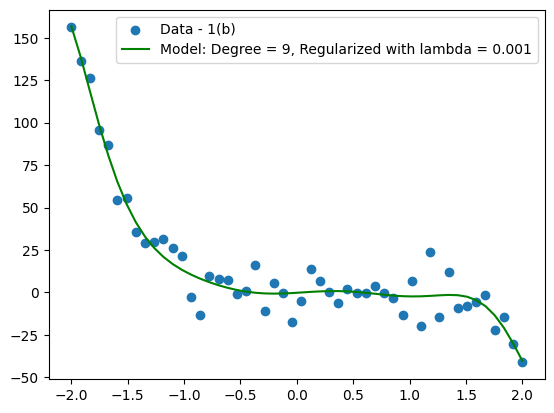

Training ERMSE = 9.011692470214504


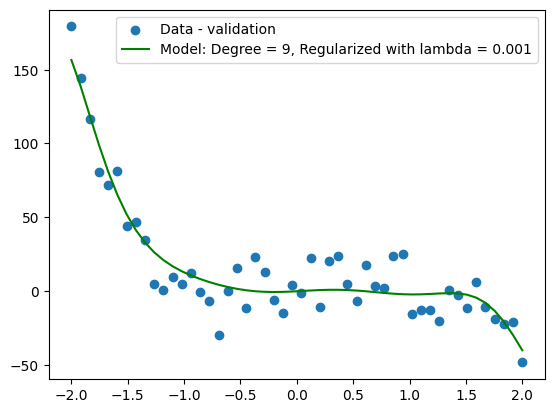

Validation ERMSE = 13.79742979512521


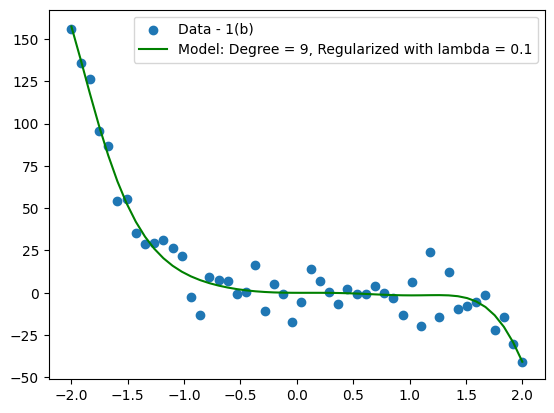

Training ERMSE = 9.03559072301559


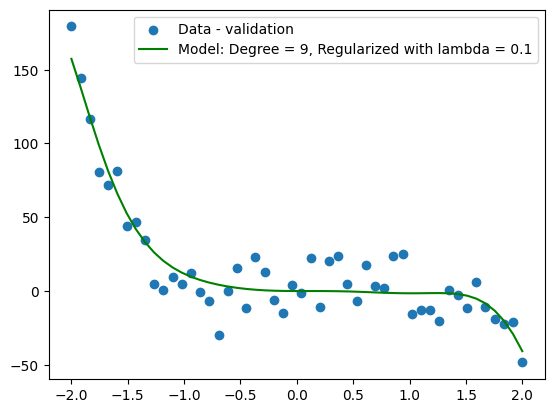

Validation ERMSE = 13.742178140178984


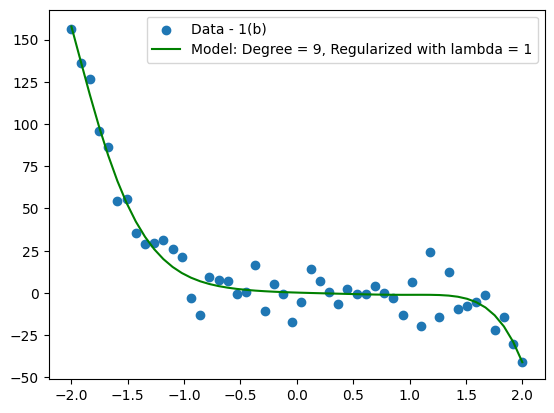

Training ERMSE = 9.065867966475293


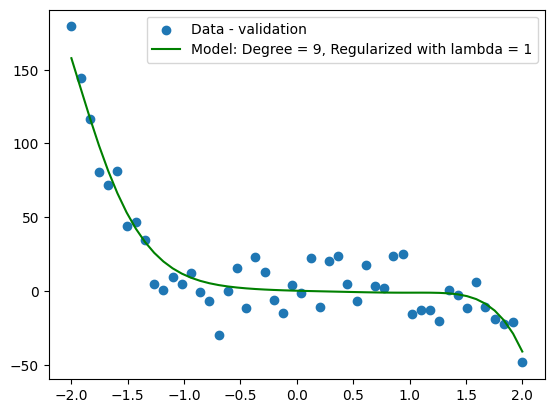

Validation ERMSE = 13.68265803158925
Best lambda for degree = 9 is 1, with a Validation ERMSE = 13.68265803158925
Best performing model := degree = 9, lambda = 1, with Validation ERMSE = 13.41660041017166


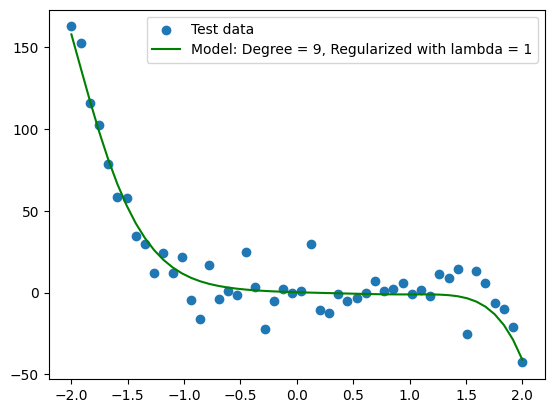

Test ERMSE = 10.835315363420879


In [33]:
for deg in degrees:
    #check if there is overfitting, if not, output "no overfitting"
    model = PolyRegression(degree = deg, number = 1)
    model.fit(x1, y1)
    error1 = model.ERMSE(x1, y1)
    error2 = model.ERMSE(xvalid, yvalid)

    if error2 < 1.5 * error1 :                          #hyperparameter : overfit threshold ratio, decide on this
        print(f"No overfitting for degree = {deg}")
        continue

    best_lambda = None
    best_loc_ermse = float('inf')
    for lmb in lambdas:
        model = PolyRegression(degree = deg, number = 1, lmbda = lmb)
        model.fit(x1, y1)
        error1 = model.ERMSE(x1, y1)
        error2 = model.ERMSE(xvalid, yvalid)

        polyline = np.linspace(x1.min(), x1.max())

        plt.figure()
        plt.scatter(x1, y1, label = "Data - 1(b)")
        plt.plot(polyline, model.output(polyline), color = "green", label = f"Model: Degree = {deg}, Regularized with lambda = {lmb}")
        plt.legend()
        plt.show()

        print("Training ERMSE =",error1)

        polyline2 = np.linspace(xvalid.min(), xvalid.max())

        plt.figure()
        plt.scatter(xvalid, yvalid, label = "Data - validation")
        plt.plot(polyline, model.output(polyline2), color = "green", label = f"Model: Degree = {deg}, Regularized with lambda = {lmb}")
        plt.legend()
        plt.show()

        print("Validation ERMSE =", error2)

        if error2 < best_loc_ermse:
            best_loc_ermse = error2
            best_lambda = lmb
        
    print(f"Best lambda for degree = {deg} is {best_lambda}, with a Validation ERMSE = {best_loc_ermse}")

    if best_loc_ermse < best_ermse:
        best_ermse = best_loc_ermse
        best_model = (deg, best_lambda)

print(f"Best performing model := degree = {best_model[0]}, lambda = {best_model[1]}, with Validation ERMSE = {best_ermse}")

test = pd.read_csv("Dataset1/Dataset1/test.txt")

xt = np.array(test.x)
yt = np.array(test.y)

model = PolyRegression(degree = best_model[0], number = 1, lmbda = best_model[1])
model.fit(x1, y1)
error1 = model.ERMSE(xt, yt)

polyline = np.linspace(xt.min(), xt.max())

plt.figure()
plt.scatter(xt, yt, label = "Test data")
plt.plot(polyline, model.output(polyline), color = "green", label = f"Model: Degree = {best_model[0]}, Regularized with lambda = {best_model[1]}")
plt.legend()
plt.show()

print("Test ERMSE =",error1)

No overfitting for degree = 2


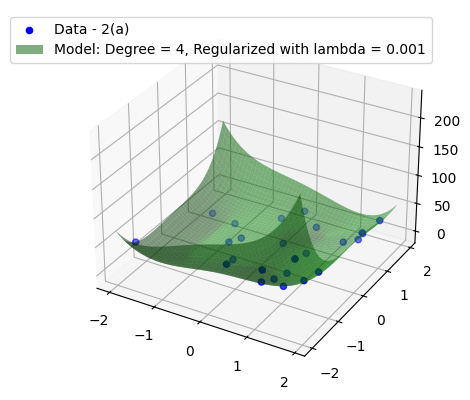

Training ERMSE = 1.4766904256170128


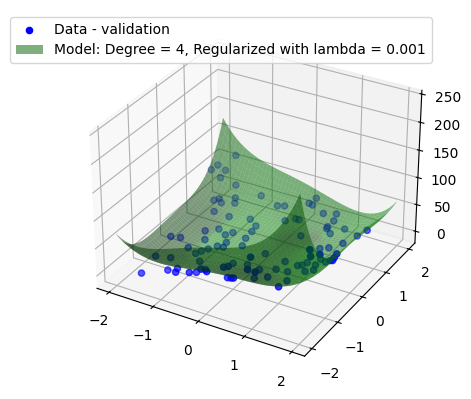

Validation ERMSE = 5.367950382087842


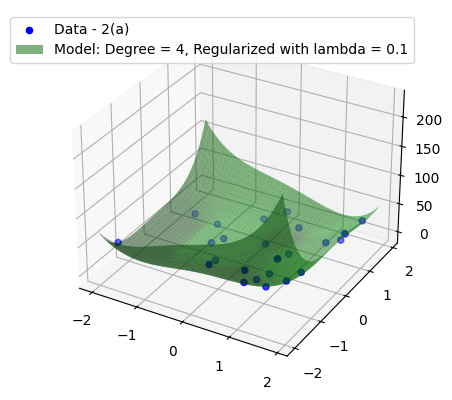

Training ERMSE = 1.4908477749454634


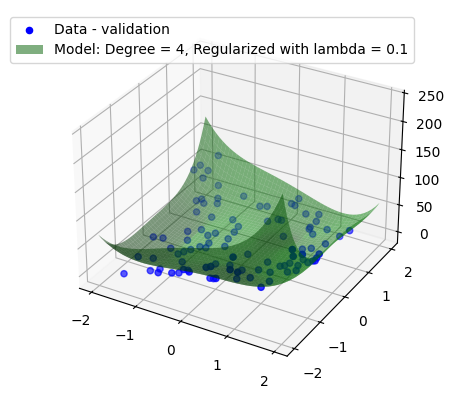

Validation ERMSE = 5.614814392364502


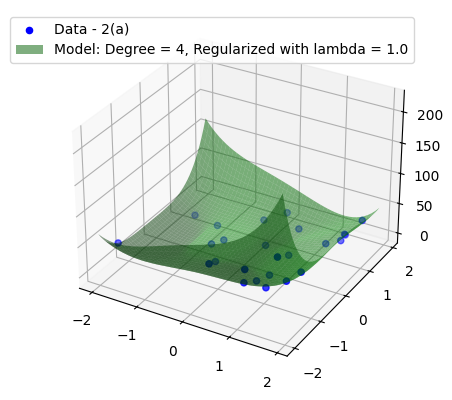

Training ERMSE = 1.8057329103916775


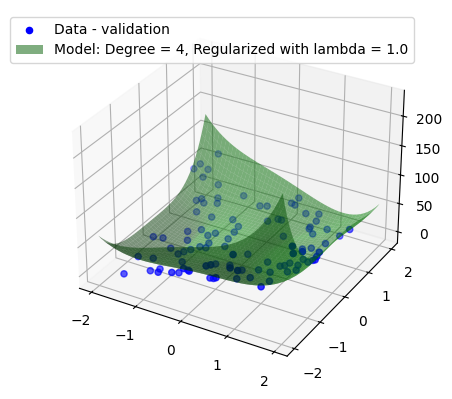

Validation ERMSE = 6.1291469205968765
Best lambda for degree = 4 is 0.001, with a Validation ERMSE = 5.367950382087842


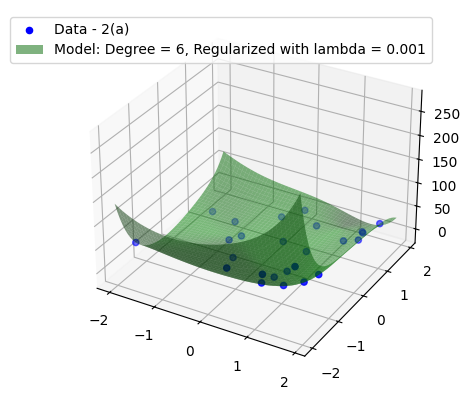

Training ERMSE = 0.009449412225772086


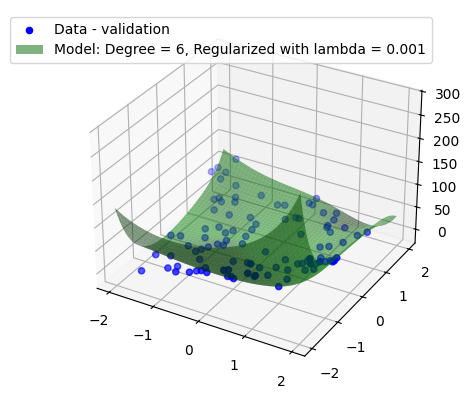

Validation ERMSE = 9.165765137144739


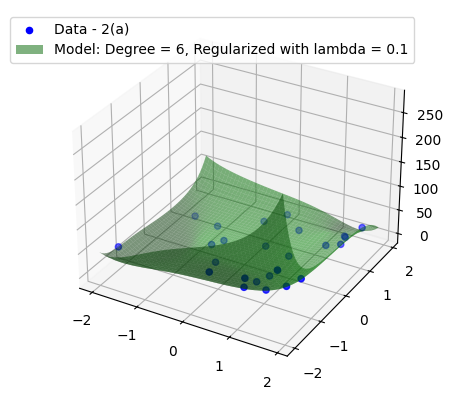

Training ERMSE = 0.13224871938103505


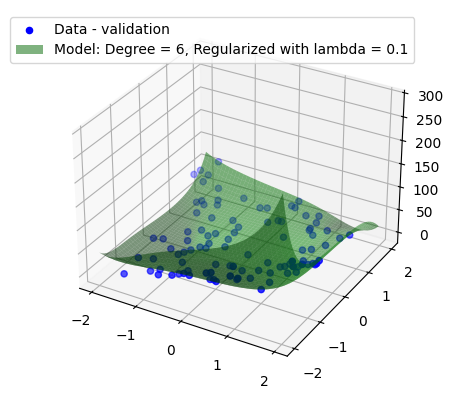

Validation ERMSE = 5.24471993933849


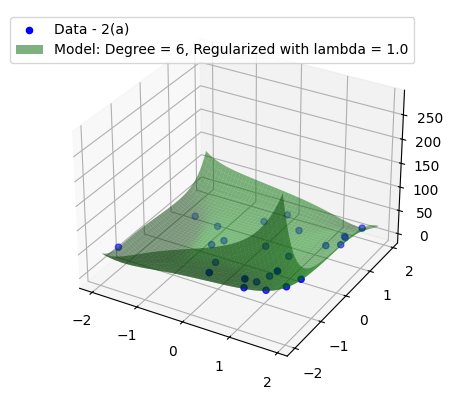

Training ERMSE = 0.3469971086768665


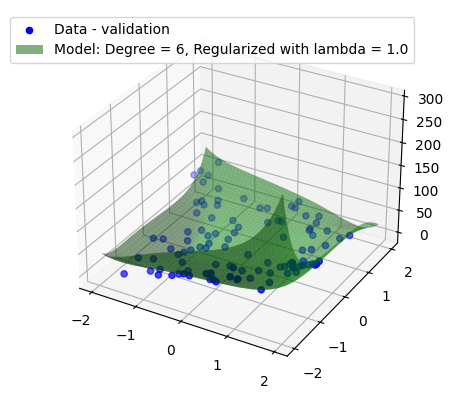

Validation ERMSE = 5.0942327425923635
Best lambda for degree = 6 is 1.0, with a Validation ERMSE = 5.0942327425923635


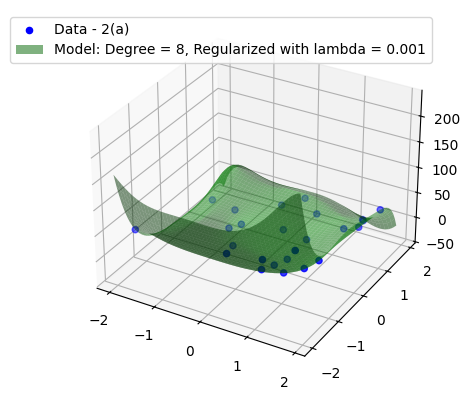

Training ERMSE = 0.002363678422834249


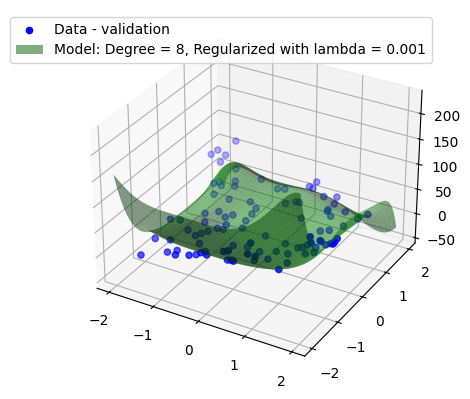

Validation ERMSE = 13.790130981281562


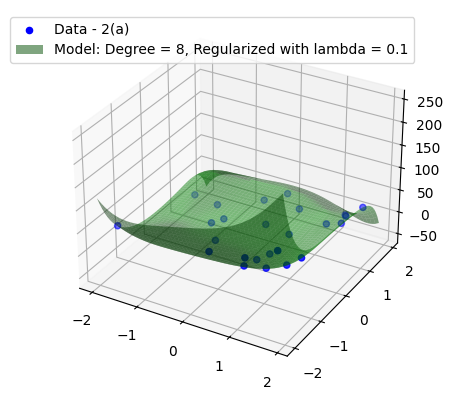

Training ERMSE = 0.09452916119553993


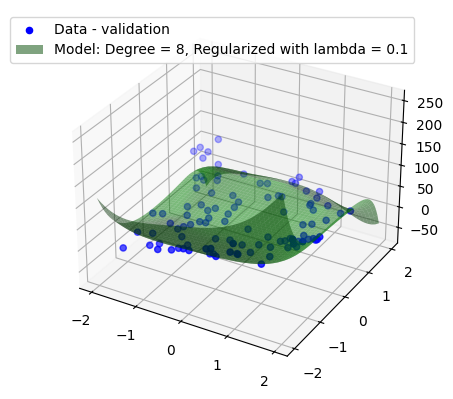

Validation ERMSE = 13.160459941616201


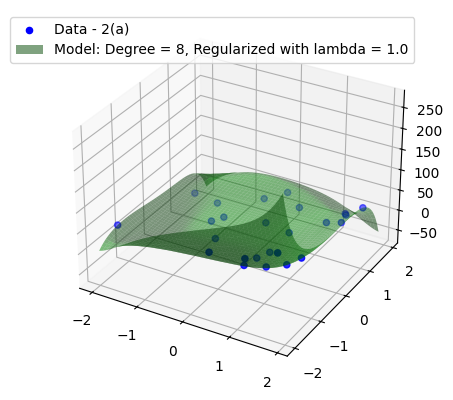

Training ERMSE = 0.23990010927810507


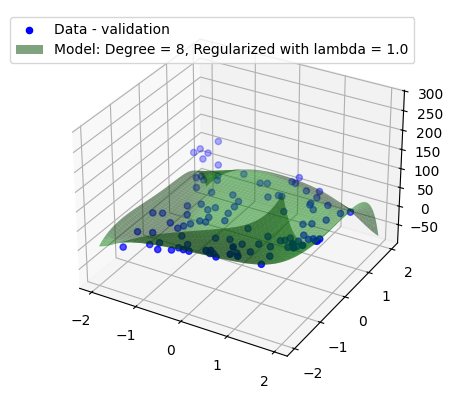

Validation ERMSE = 13.647030616495943
Best lambda for degree = 8 is 0.1, with a Validation ERMSE = 13.160459941616201
Best performing model := degree = 6, lambda = 1.0, with Validation ERMSE = 5.0942327425923635


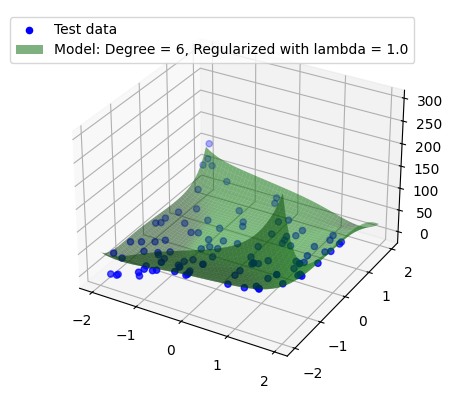

Test ERMSE = 10.463630466908308


In [40]:
train25 = pd.read_csv("Dataset2/Dataset2/train25.csv")

train100 = pd.read_csv("Dataset2/Dataset2/train100.csv")

valid = pd.read_csv("Dataset2/Dataset2/validation.csv")

x1 = np.array(train25.x1)
x2 = np.array(train25.x2)
y = np.array(train25.y)

x11 = np.array(train100.x1)
x22 = np.array(train100.x1)
y1 = np.array(train100.y)

x1v = np.array(valid.x1)
x2v = np.array(valid.x2)
yvalid = np.array(valid.y)

x = np.column_stack((x1, x2))
# x1 = np.column_stack((x11, x22))
xvalid = np.column_stack((x1v, x2v))


lambdas = [0.001, 0.1, 1.0]
degrees = [2, 4, 6, 8]
best_model = (0,0.0)
best_ermse = float('inf')



for deg in degrees:
    #check if there is overfitting, if not, output "no overfitting"
    model = PolyRegression(degree = deg, number = 2)
    model.fit(x, y)
    error1 = model.ERMSE(x, y)
    error2 = model.ERMSE(xvalid, yvalid)

    if error2 < 1.5 * error1 :                          #hyperparameter : overfit threshold ratio, decide on this
        print(f"No overfitting for degree = {deg}")
        continue

    best_lambda = None
    best_loc_ermse = float('inf')
    for lmb in lambdas:
        model = PolyRegression(degree = deg, number = 2, lmbda = lmb)
        model.fit(x, y)
        error1 = model.ERMSE(x, y)
        error2 = model.ERMSE(xvalid, yvalid)

        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')
        ax.scatter(x[:,0], x[:,1], y, color = "blue", label = "Data - 2(a)")

        x1_range = np.linspace(min(x1.min(), x2.min()), max(x1.max(), x2.max()))
        X1, X2 = np.meshgrid(x1_range, x1_range)
        grid_points = np.column_stack([X1.ravel(), X2.ravel()])
        Z = model.output(grid_points).reshape(X1.shape)
        ax.plot_surface(X1, X2, Z, color="green", alpha = 0.5, label = f"Model: Degree = {deg}, Regularized with lambda = {lmb}")

        ax.legend()
        plt.show()

        print("Training ERMSE =",error1)

        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')
        ax.scatter(xvalid[:,0], xvalid[:,1], yvalid, color = "blue", label = "Data - validation")

        xvalid_range = np.linspace(min(x1v.min(), x2v.min()), max(x1v.max(), x2v.max()))
        X1, X2 = np.meshgrid(xvalid_range, xvalid_range)
        grid_points = np.column_stack([X1.ravel(), X2.ravel()])
        Z = model.output(grid_points).reshape(X1.shape)
        ax.plot_surface(X1, X2, Z, color="green", alpha = 0.5, label = f"Model: Degree = {deg}, Regularized with lambda = {lmb}")

        ax.legend()
        plt.show()

        print("Validation ERMSE =", error2)

        if error2 < best_loc_ermse:
            best_loc_ermse = error2
            best_lambda = lmb
        
    print(f"Best lambda for degree = {deg} is {best_lambda}, with a Validation ERMSE = {best_loc_ermse}")

    if best_loc_ermse < best_ermse:
        best_ermse = best_loc_ermse
        best_model = (deg, best_lambda)

print(f"Best performing model := degree = {best_model[0]}, lambda = {best_model[1]}, with Validation ERMSE = {best_ermse}")

test = pd.read_csv("Dataset2/Dataset2/test.csv")

xt1 = np.array(test.x1)
xt2 = np.array(test.x2)
xt = np.column_stack((xt1, xt2))
yt = np.array(test.y)

model = PolyRegression(degree = best_model[0], number = 2, lmbda = best_model[1])
model.fit(x, y)
error1 = model.ERMSE(xt, yt)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xt[:,0], xt[:,1], yt, color = "blue", label = "Test data")

x1_range = np.linspace(min(xt1.min(), xt2.min()), max(xt1.max(), xt2.max()))
X1, X2 = np.meshgrid(x1_range, x1_range)
grid_points = np.column_stack([X1.ravel(), X2.ravel()])
Z = model.output(grid_points).reshape(X1.shape)
ax.plot_surface(X1, X2, Z, color="green", alpha = 0.5, label = f"Model: Degree = {best_model[0]}, Regularized with lambda = {best_model[1]}")

ax.legend()
plt.show()

print("Test ERMSE =",error1)

In [43]:
x1 = np.column_stack((x11, x22))

best_ermse = float('inf')
best_model = (0, 0.0)

for deg in degrees:
    #check if there is overfitting, if not, output "no overfitting"
    model = PolyRegression(degree = deg, number = 2)
    model.fit(x1, y1)
    error1 = model.ERMSE(x1, y1)
    error2 = model.ERMSE(xvalid, yvalid)

    if error2 < 1.5 * error1 :                          #hyperparameter : overfit threshold ratio, decide on this
        print(f"No overfitting for degree = {deg}")
        continue

    best_lambda = None
    best_loc_ermse = float('inf')
    for lmb in lambdas:
        model = PolyRegression(degree = deg, number = 2, lmbda = lmb)
        model.fit(x1, y1)
        error1 = model.ERMSE(x1, y1)
        error2 = model.ERMSE(xvalid, yvalid)

        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')
        ax.scatter(x1[:,0], x1[:,1], y1, color = "blue", label = "Data - 2(b)")

        x1_range = np.linspace(min(x11.min(), x22.min()), max(x11.max(), x22.max()))
        X1, X2 = np.meshgrid(x1_range, x1_range)
        grid_points = np.column_stack([X1.ravel(), X2.ravel()])
        Z = model.output(grid_points).reshape(X1.shape)
        ax.plot_surface(X1, X2, Z, color="green", alpha = 0.5, label = f"Model: Degree = {deg}, Regularized with lambda = {lmb}")

        ax.legend()
        plt.show()

        print("Training ERMSE =",error1)

        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')
        ax.scatter(xvalid[:,0], xvalid[:,1], yvalid, color = "blue", label = "Data - validation")

        x1_range = np.linspace(min(x1v.min(), x2v.min()), max(x1v.max(), x2v.max()))
        X1, X2 = np.meshgrid(x1_range, x1_range)
        grid_points = np.column_stack([X1.ravel(), X2.ravel()])
        Z = model.output(grid_points).reshape(X1.shape)
        ax.plot_surface(X1, X2, Z, color="green", alpha = 0.5, label = f"Model: Degree = {deg}, Regularized with lambda = {lmb}")

        ax.legend()
        plt.show()

        print("Validation ERMSE =", error2)

        if error2 < best_loc_ermse:
            best_loc_ermse = error2
            best_lambda = lmb
        
    print(f"Best lambda for degree = {deg} is {best_lambda}, with a Validation ERMSE = {best_loc_ermse}")

    if best_loc_ermse < best_ermse:
        best_ermse = best_loc_ermse
        best_model = (deg, best_lambda)

if best_model != (0, 0.0):

    print(f"Best performing model := degree = {best_model[0]}, lambda = {best_model[1]}, with Validation ERMSE = {best_ermse}")

    test = pd.read_csv("Dataset2/Dataset2/test.csv")

    xt1 = np.array(test.x1)
    xt2 = np.array(test.x2)
    xt = np.column_stack((xt1, xt2))
    yt = np.array(test.y)

    model = PolyRegression(degree = best_model[0], number = 2, lmbda = best_model[1])
    model.fit(x1, y1)
    error1 = model.ERMSE(xt, yt)

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(xt[:,0], xt[:,1], yt, color = "blue", label = "Test data")

    x1_range = np.linspace(min(xt1.min(), xt2.min()), max(xt1.max(), xt2.max()))
    X1, X2 = np.meshgrid(x1_range, x1_range)
    grid_points = np.column_stack([X1.ravel(), X2.ravel()])
    Z = model.output(grid_points).reshape(X1.shape)
    ax.plot_surface(X1, X2, Z, color="green", alpha = 0.5, label = f"Model: Degree = {best_model[0]}, Regularized with lambda = {best_model[1]}")

    ax.legend()
    plt.show()

    print("Test ERMSE =",error1)

No overfitting for degree = 2
No overfitting for degree = 4
No overfitting for degree = 6
No overfitting for degree = 8


Best k = 5, best sigma = 2.0


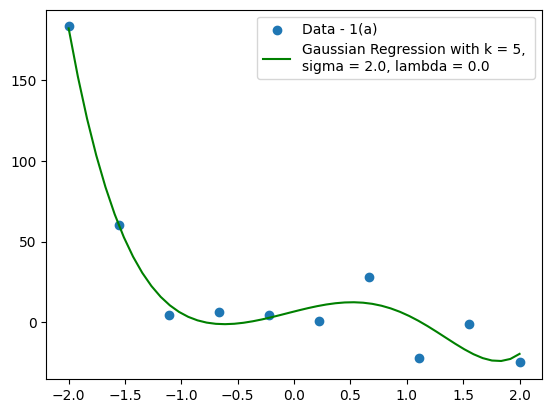

Training ERMSE = 11.484802911010782
Validation ERMSE = 13.415684770186248


In [159]:
x = np.array(train10.x)
y = np.array(train10.y)

x = x.reshape(len(x), 1)

trainvalid = pd.read_csv("Dataset1/Dataset1/val.txt")

xvalid = np.array(trainvalid.x)
yvalid = np.array(trainvalid.y)

xvalid = xvalid.reshape(len(xvalid), 1)

class GaussianRegression:
    def __init__(self, n_clusters=3, max_iter=100, tol=1e-4, sigma = 1.0, lmbda = 0.0):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.tol = tol
        self.mus = None       # cluster centers
        self.sigma = sigma   # width parameter
        self.lmbda = lmbda
        self.w = None         # regression weights
    
    def _initialize_clusters(self, X):
        """Randomly initialize cluster centers (mus)."""
        n_samples, n_features = X.shape
        indices = np.random.choice(n_samples, self.n_clusters, replace=False)
        self.mus = X[indices]  # shape (k, n_features)

    def _assign_clusters(self, X):
        """Assign each point to the nearest cluster center."""
        distances = np.linalg.norm(X[:, None, :] - self.mus[None, :, :], axis=2)  # shape (n_samples, k)
        return np.argmin(distances, axis=1)

    def _update_mus(self, X, labels):
        """Update cluster centers (mus)."""
        new_mus = np.zeros_like(self.mus)
        for k in range(self.n_clusters):
            points = X[labels == k]
            if len(points) > 0:
                new_mus[k] = points.mean(axis=0)
            else:
                new_mus[k] = self.mus[k]  # no update if cluster is empty
        return new_mus

    def _gaussian_basis(self, X, mu):
        # """Compute Gaussian basis function for given mean and covariance."""
        n_features = X.shape[1]
        diff = X - mu
        sq_norm = np.sum(diff**2, axis=1)
        exponent = -sq_norm / (2 * self.sigma**2)
        return np.exp(exponent)

    def _design_matrix(self, X):
        # """Build the design matrix using Gaussian basis functions."""
        n_samples = X.shape[0]
        Phi = np.ones((n_samples, self.n_clusters + 1))  # +1 for bias term
        for k in range(self.n_clusters):
            Phi[:, k+1] = self._gaussian_basis(X, self.mus[k])
        return Phi

    def fit(self, X, y):
        # """Fit the Gaussian regression model."""
        # Step 1: Run k-means to find mus and sigmas
        self._initialize_clusters(X)
        for _ in range(self.max_iter):
            labels = self._assign_clusters(X)
            new_mus = self._update_mus(X, labels)
            if np.linalg.norm(self.mus - new_mus) < self.tol:
                break
            self.mus = new_mus

        # Step 2: Build design matrix
        Phi = self._design_matrix(X)

        #implement regularization

        n_params = Phi.shape[1]
        I = np.eye(n_params)
        I[0,0] = 0      #no regularization for the bias term

        # Step 3: Solve for weights (least squares)
        self.w = np.linalg.pinv(Phi.T @ Phi + self.lmbda * I) @ Phi.T @ y
        return self

    def predict(self, X_new):
        # """Predict output for new data."""
        Phi_new = self._design_matrix(X_new)
        return Phi_new @ self.w
    
    def ERMSE(self, X:np.ndarray, y:np.ndarray) -> float:
        pred = self.predict(X)
        results = np.square(np.subtract(pred, y)).mean()
        return np.sqrt(results)
    

def find_best_params(X : np.ndarray, Y : np.ndarray, lmb : float = 0.0, dataset : str = ""):
    n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]
    sigmas = [0.1, 0.5, 1.0, 2.0, 3.0, 4.0, 5.0]

    best_rmse = float('inf')
    best_params = (1, 0.0)

    for n_cl in n_clusters:
        for sig in sigmas:
            model = GaussianRegression(n_clusters = n_cl, sigma = sig, lmbda = lmb)
            model.fit(X, Y)
            val_rmse = model.ERMSE(xvalid, yvalid)
            if val_rmse < best_rmse:
                best_rmse = val_rmse
                best_params = (n_cl, sig)
    print(f"Best k = {best_params[0]}, best sigma = {best_params[1]}")

    model = GaussianRegression(n_clusters = best_params[0], sigma = best_params[1])

    model.fit(X, Y)

    error1 = model.ERMSE(X, Y)
    error2 = model.ERMSE(xvalid, yvalid)

    polyline = np.linspace(X.min(), X.max())

    plt.scatter(X, Y, label = f"Data - {dataset}")
    plt.plot(polyline, model.predict(polyline.reshape(-1,1)), color = "green", label = f"Gaussian Regression with k = {best_params[0]}, \nsigma = {best_params[1]}, lambda = {lmb}")
    plt.legend()
    plt.show()
    print("Training ERMSE =",error1)
    print("Validation ERMSE =", error2)
    return (best_params, (error2 > 1.25 * error1), error2)
    

best_params = find_best_params(x, y, 0.0, "1(a)")



Best k = 8, best sigma = 1.0


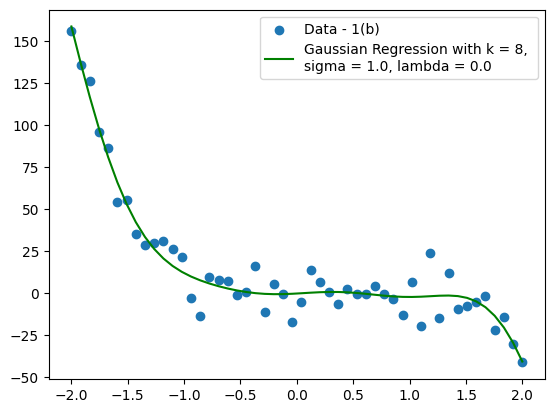

Training ERMSE = 9.05479490898181
Validation ERMSE = 13.680070697643655


In [160]:
#Gaussian without regularization for DataSet 1(b)
x1 = np.array(train50.x)
y1 = np.array(train50.y)

x1 = x1.reshape(len(x1), 1)

best_params = find_best_params(x1, y1, 0.0, "1(b)")

Best k = 6, best sigma = 3.0


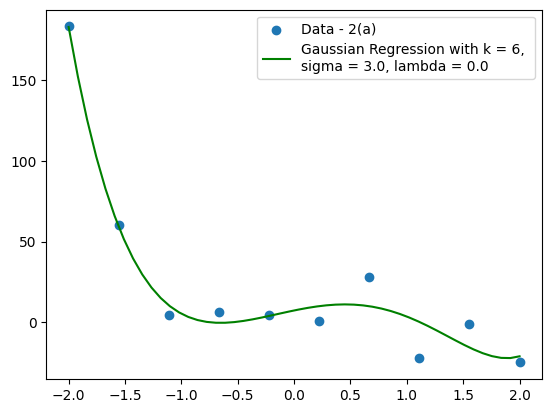

Training ERMSE = 11.104673916053999
Validation ERMSE = 13.087348257184265
No overfitting for k = 6, sigma = 3.0
Best k = 7, best sigma = 3.0


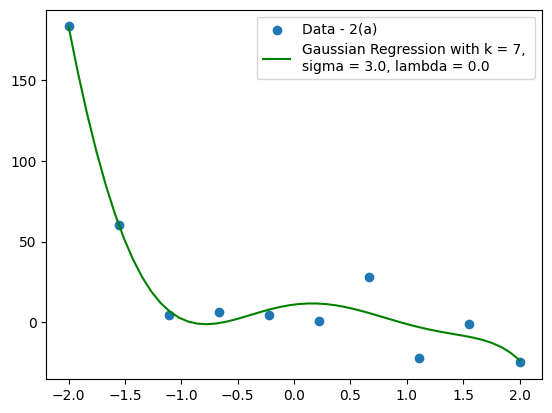

Training ERMSE = 10.603414488393094
Validation ERMSE = 13.11714524056122
No overfitting for k = 7, sigma = 3.0
Best k = 6, best sigma = 3.0


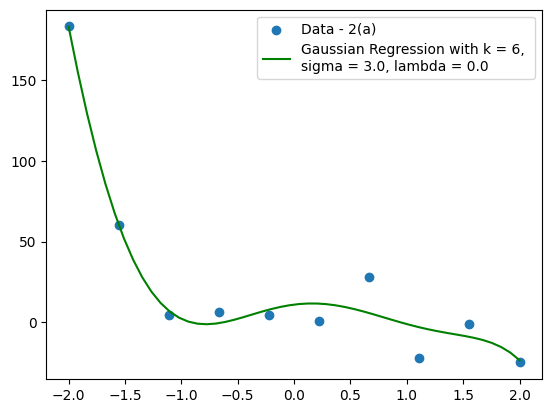

Training ERMSE = 10.60373762571651
Validation ERMSE = 13.11433449655066
No overfitting for k = 6, sigma = 3.0
Best k = 6, best sigma = 3.0, best lambda = 0.0, best RMSE = 13.087348257184265


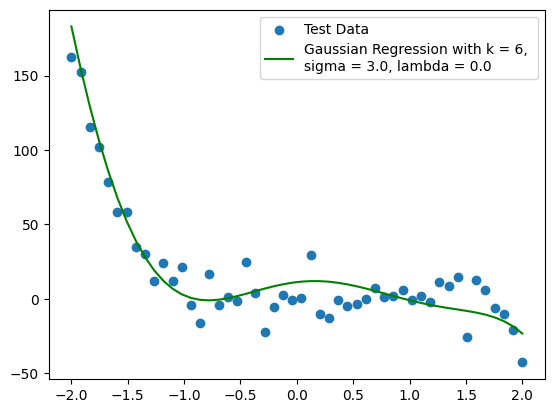

Test RMSE =  12.869995252024047


In [164]:
lambdas = [0.001, 0.1, 1.0]

best_p = (0, 0.0)
best_mse = float('inf')
best_lmb = None

for lmb in lambdas:
    best_params = find_best_params(x, y, 0.0, "2(a)")
    if best_params[2] < best_mse:
        best_mse = best_params[2]
        best_p = best_params[0]
        best_lmb = 0.0
        
    if best_params[1] == True:
        #overfitting
        p = find_best_params(x, y, lmb, "2(a)")
        if p[2] < best_mse:
            best_mse = p[2]
            best_p = p[0]
            best_lmb = lmb
    else:
        print(f"No overfitting for k = {best_params[0][0]}, sigma = {best_params[0][1]}")

print(f"Best k = {best_p[0]}, best sigma = {best_p[1]}, best lambda = {best_lmb}, best RMSE = {best_mse}")

model = GaussianRegression(n_clusters = best_p[0], sigma = best_p[1], lmbda = best_lmb)

model.fit(x, y)

test = pd.read_csv("Dataset1/Dataset1/test.txt")
xt = np.array(test.x)
yt = np.array(test.y)

xt = xt.reshape(len(xt), 1)
errort = model.ERMSE(xt, yt)

polyline = np.linspace(xt.min(), xt.max())

plt.scatter(xt, yt, label = f"Test Data")
plt.plot(polyline, model.predict(polyline.reshape(-1,1)), color = "green", label = f"Gaussian Regression with k = {best_p[0]}, \nsigma = {best_p[1]}, lambda = {best_lmb}")
plt.legend()
plt.show()
print("Test RMSE = ", errort)
    

Best k = 4, best sigma = 5.0


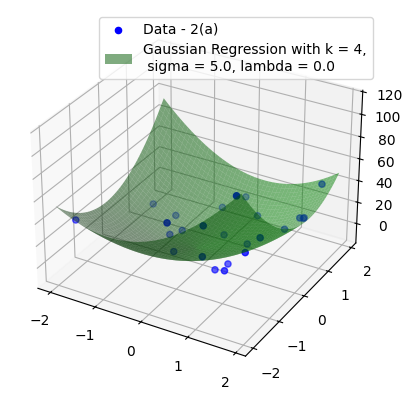

Training ERMSE = 10.946634768216079
Validation ERMSE = 10.64678665435505


In [155]:
train25 = pd.read_csv("Dataset2/Dataset2/train25.csv")

train100 = pd.read_csv("Dataset2/Dataset2/train100.csv")

valid = pd.read_csv("Dataset2/Dataset2/validation.csv")

x1 = np.array(train25.x1)
x2 = np.array(train25.x2)
y = np.array(train25.y)

x11 = np.array(train100.x1)
x22 = np.array(train100.x1)
y1 = np.array(train100.y)

x1v = np.array(valid.x1)
x2v = np.array(valid.x2)
yvalid = np.array(valid.y)

x = np.column_stack((x1, x2))
# x1 = np.column_stack((x11, x22))
xvalid = np.column_stack((x1v, x2v))

def find_best_params3d(X : np.ndarray, Y : np.ndarray, lmb : float = 0.0, dataset : str = ""):
    n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]
    sigmas = [0.1, 0.5, 1.0, 2.0, 3.0, 4.0, 5.0]

    best_rmse = float('inf')
    best_params = (1, 0.0)

    for n_cl in n_clusters:
        for sig in sigmas:
            model = GaussianRegression(n_clusters = n_cl, sigma = sig, lmbda = lmb)
            model.fit(X, Y)
            val_rmse = model.ERMSE(xvalid, yvalid)
            # print(val_rmse)
            if val_rmse < best_rmse:
                best_rmse = val_rmse
                best_params = (n_cl, sig)
    print(f"Best k = {best_params[0]}, best sigma = {best_params[1]}")

    model = GaussianRegression(n_clusters = best_params[0], sigma = best_params[1])

    model.fit(X, Y)

    error1 = model.ERMSE(X, Y)
    error2 = model.ERMSE(xvalid, yvalid)

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(X[:,0], X[:,1], Y, color = "blue", label = f"Data - {dataset}")

    x1_range = np.linspace(min(X[:,0].min(), X[:,1].min()), max(X[:,0].max(), X[:,1].max()))
    X1, X2 = np.meshgrid(x1_range, x1_range)
    grid_points = np.column_stack([X1.ravel(), X2.ravel()])
    Z = model.predict(grid_points).reshape(X1.shape)
    ax.plot_surface(X1, X2, Z, color="green", alpha = 0.5, label = f"Gaussian Regression with k = {best_params[0]},\n sigma = {best_params[1]}, lambda = {lmb}")

    ax.legend()
    plt.show()
    print("Training ERMSE =",error1)
    print("Validation ERMSE =", error2)
    return (best_params, (error2 > 1.25 * error1), error2)

best_params = find_best_params3d(x, y, 0.0, "2(a)")

Best k = 7, best sigma = 1.0


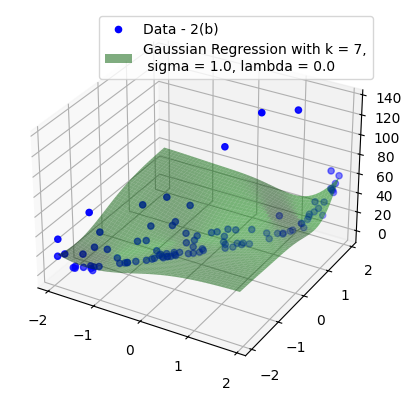

Training ERMSE = 22.873393301050253
Validation ERMSE = 21.839359151399467


In [137]:
x1 = np.column_stack((x11, x22))

best_params = find_best_params3d(x1, y1, 0.0, "2(b)")

Best k = 4, best sigma = 5.0


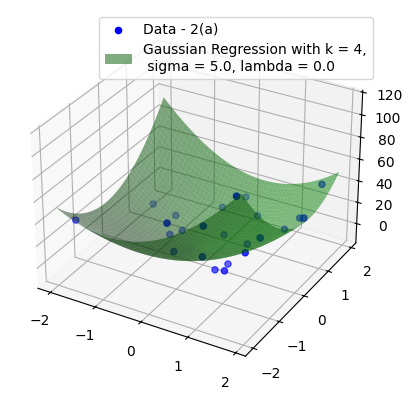

Training ERMSE = 10.892623429679757
Validation ERMSE = 10.646594647217023
No overfitting for k = 4, sigma = 5.0
Best k = 4, best sigma = 4.0


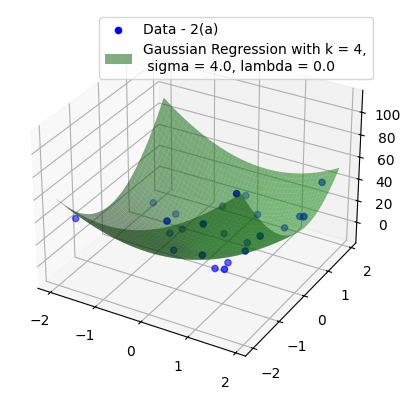

Training ERMSE = 10.61169513616617
Validation ERMSE = 11.477143878349526
No overfitting for k = 4, sigma = 4.0
Best k = 4, best sigma = 5.0


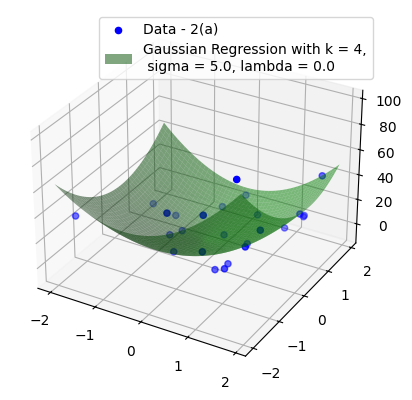

Training ERMSE = 12.17747350401294
Validation ERMSE = 13.493994394992352
No overfitting for k = 4, sigma = 5.0
Best k = 4, best sigma = 5.0, best lambda = 0.0, best RMSE = 10.646594647217023


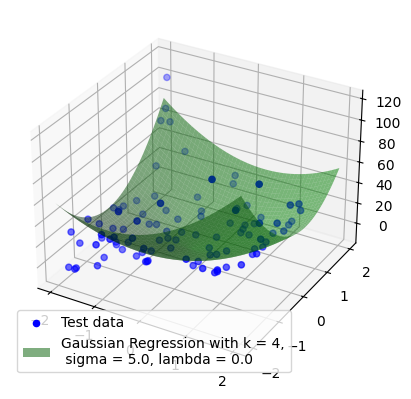

Test RMSE = 15.01336982426851


In [158]:
lambdas = [0.001, 0.1, 1.0]

best_p = (0, 0.0)
best_mse = float('inf')
best_lmb = None

for lmb in lambdas:
    best_params = find_best_params3d(x, y, 0.0, "2(a)")
    if best_params[2] < best_mse:
        best_mse = best_params[2]
        best_p = best_params[0]
        best_lmb = 0.0
    if best_params[1] == True:
        #overfitting
        p = find_best_params3d(x, y, lmb, "2(a)")
        if p[2] < best_mse:
            best_mse = p[2]
            best_p = p[0]
            best_lmb = lmb
    else:
        print(f"No overfitting for k = {best_params[0][0]}, sigma = {best_params[0][1]}")

print(f"Best k = {best_p[0]}, best sigma = {best_p[1]}, best lambda = {best_lmb}, best RMSE = {best_mse}")
model = GaussianRegression(n_clusters = best_p[0], sigma = best_p[1], lmbda = best_lmb)
model.fit(x, y)

test = pd.read_csv("Dataset2/Dataset2/test.csv")

xt1 = np.array(test.x1)
xt2 = np.array(test.x2)
yt = np.array(test.y)

xt = np.column_stack((xt1, xt2))

error = model.ERMSE(xt, yt)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xt[:,0], xt[:,1], yt, color = "blue", label = f"Test data")

x1_range = np.linspace(min(xt[:,0].min(), xt[:,1].min()), max(xt[:,0].max(), xt[:,1].max()))
X1, X2 = np.meshgrid(x1_range, x1_range)
grid_points = np.column_stack([X1.ravel(), X2.ravel()])
Z = model.predict(grid_points).reshape(X1.shape)
ax.plot_surface(X1, X2, Z, color="green", alpha = 0.5, label = f"Gaussian Regression with k = {best_p[0]},\n sigma = {best_p[1]}, lambda = {best_lmb}")

ax.legend()
plt.show()
print(f"Test RMSE = {error}")
    

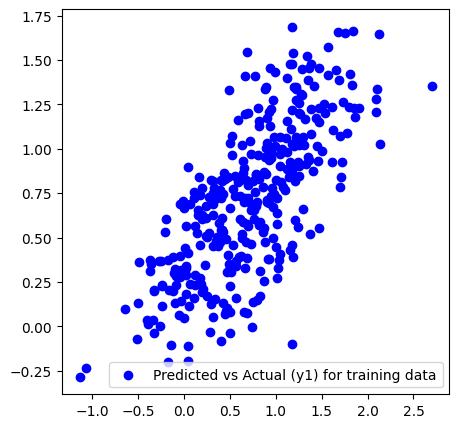

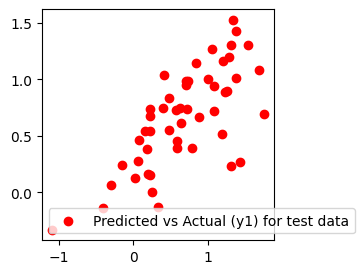

In [ ]:
train = pd.read_csv("Dataset3/Dataset3/dataset3_train.csv")

valid = pd.read_csv("Dataset3/Dataset3/dataset3_val.csv")

x1 = np.array(train.x1)
x2 = np.array(train.x2)
x3 = np.array(train.x3)

y1 = np.array(train.y1)
y2 = np.array(train.y2)
y3 = np.array(train.y3)

x = np.column_stack((x1, x2, x3))

x1v = np.array(valid.x1)
x2v = np.array(valid.x2)
x3v = np.array(valid.x3)

y1v = np.array(valid.y1)
y2v = np.array(valid.y2)
y3v = np.array(valid.y3)

xv = np.column_stack((x1v, x2v, x3v))

test = pd.read_csv("Dataset3/Dataset3/dataset3_test.csv")

x1t = np.array(test.x1)
x2t = np.array(test.x2)
x3t = np.array(test.x3)

y1t = np.array(test.y1)
y2t = np.array(test.y2)
y3t = np.array(test.y3)

xt = np.column_stack((x1t, x2t, x3t))

#first model PolyRegression

degrees = [2, 3, 4]

lambdas = [0.000001, 0.0001, 0.1]

best_mse = float('inf')

best_param = (0, 0.0)

for deg in degrees:
    model = PolyRegression(degree = deg, number = 3)
    model.fit(x, y1)
    error1 = model.ERMSE(x, y1)
    error2 = model.ERMSE(xv, y1v)
    # if error2 < 1.25 * error1:
    #     print(f"No overfitting for degree = {deg}, for y1")
    #     continue

    for lmb in lambdas:
        model1 = PolyRegression(degree = deg, number = 3, lmbda = lmb)
        model1.fit(x, y1)
        error = model1.ERMSE(xv, y1v)

        if error < best_mse:
            best_mse = error
            best_param = (deg, lmb)

model = PolyRegression(degree = best_param[0], number = 3, lmbda = best_param[1])

model.fit(x, y1)

plt.figure(figsize = (10, 5))
plt.scatter(y1, model.output(x), color = "blue", label = "Predicted vs Actual (y1) for training data")
plt.legend()
plt.show()


plt.figure(figsize = (3, 3))
plt.scatter(y1t, model.output(xt), color = "red", label = "Predicted vs Actual (y1) for test data")
plt.legend()
plt.show()

